In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tree Builder

In [2]:
tree = pd.read_csv('../Data/tree_algorithm/set_tree.csv')
sdf = pd.read_csv('../Data/tree_algorithm/set_particles.csv')
tree

,x_min,y_min,side,depth,n
0,0.000000,0.000000,1.000000,0,10000
1,0.000000,0.000000,0.031250,1,8
2,0.031250,0.000000,0.031250,1,8
3,0.062500,0.000000,0.031250,1,12
4,0.062500,0.000000,0.015625,2,1
...,...,...,...,...,...
2568,0.968750,0.968750,0.031250,1,12
2569,0.968750,0.968750,0.015625,2,3
2570,0.984375,0.968750,0.015625,2,4
2571,0.968750,0.984375,0.015625,2,2


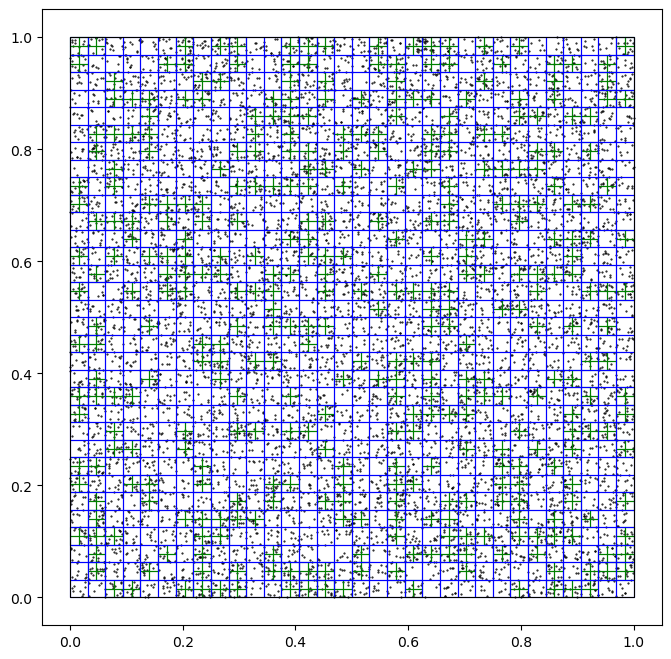

In [3]:
from matplotlib.patches import Rectangle

col=["k","blue", "green", "crimson", "orange", "yellow", "red"]
fig = plt.figure(figsize=(8,8))

for i in range(tree.shape[0]):
    plt.gca().add_patch(Rectangle((tree["x_min"][i],tree["y_min"][i]),tree["side"][i],tree["side"][i],
                    edgecolor=col[tree["depth"][i]],
                    facecolor='none',
                    lw=0.8, zorder=10-tree["depth"][i]))
plt.plot(sdf['x'], sdf['y'], '.', color='k', ms=1)
plt.show()

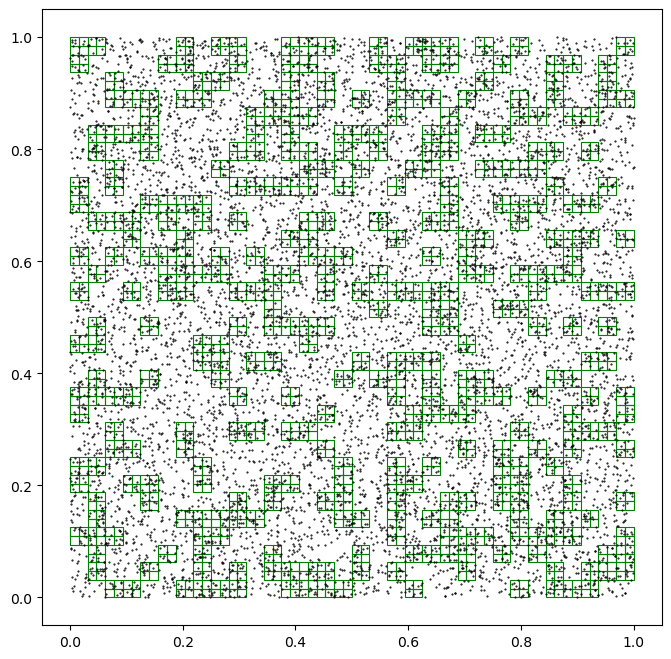

In [4]:
from matplotlib.patches import Rectangle

col=["k","blue", "green", "crimson", "orange", "yellow", "red"]
fig = plt.figure(figsize=(8,8))

for i in range(tree.shape[0]):
    if tree["depth"][i] == 2:
        plt.gca().add_patch(Rectangle((tree["x_min"][i],tree["y_min"][i]),tree["side"][i],tree["side"][i],
                    edgecolor=col[tree["depth"][i]],
                    facecolor='none',
                    lw=0.8))
plt.plot(sdf['x'], sdf['y'], '.', color='k', ms=1)
plt.show()

# Neighbor Finder

In [5]:
part = pd.read_csv('../Data/tree_algorithm/set_neighbors.csv')
particle = part["p"][0]
neightbors = part["p"][1:]

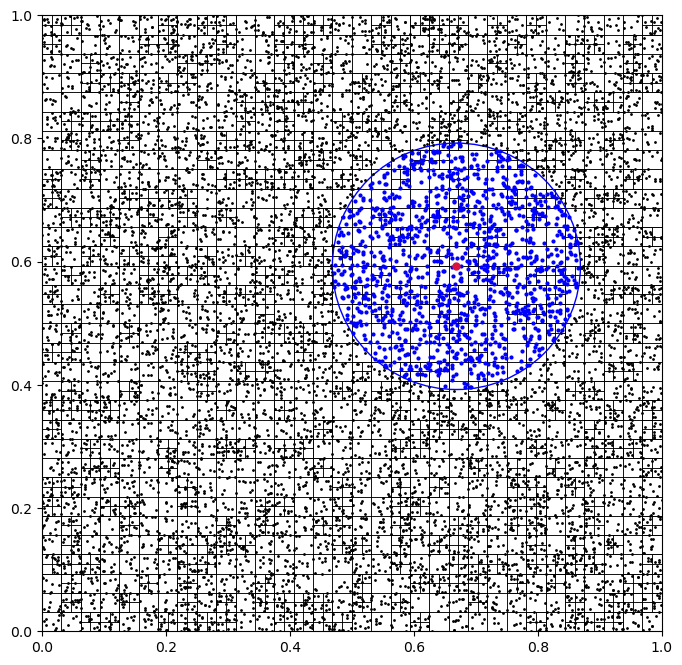

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
plt.plot(sdf['x'], sdf['y'], '.', color='k', ms=2)
plt.plot(sdf['x'][neightbors], sdf['y'][neightbors], '.', color='blue', ms=4)
plt.plot(sdf['x'][particle], sdf['y'][particle], 'o', color='crimson', ms=5)

for i in range(tree.shape[0]):
    plt.gca().add_patch(Rectangle((tree["x_min"][i],tree["y_min"][i]),tree["side"][i],tree["side"][i],
                    edgecolor="k",
                    facecolor='none',
                    lw=0.5))

compact_domain = plt.Circle((sdf['x'][particle], sdf['y'][particle]), 2*sdf["h"][particle], color='b', fill=False)
compact_domain2 = plt.Circle((sdf['x'][particle], sdf['y'][particle]+1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain3 = plt.Circle((sdf['x'][particle]+1.0, sdf['y'][particle]+1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain4 = plt.Circle((sdf['x'][particle]+1.0, sdf['y'][particle]), 2*sdf["h"][particle], color='b', fill=False)
compact_domain5 = plt.Circle((sdf['x'][particle], sdf['y'][particle]-1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain6 = plt.Circle((sdf['x'][particle]-1.0, sdf['y'][particle]-1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain7 = plt.Circle((sdf['x'][particle]-1.0, sdf['y'][particle]), 2*sdf["h"][particle], color='b', fill=False)
compact_domain8 = plt.Circle((sdf['x'][particle]+1.0, sdf['y'][particle]-1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain9 = plt.Circle((sdf['x'][particle]-1.0, sdf['y'][particle]+1.0), 2*sdf["h"][particle], color='b', fill=False)
ax.add_patch(compact_domain)
ax.add_patch(compact_domain2)
ax.add_patch(compact_domain3)
ax.add_patch(compact_domain4)
ax.add_patch(compact_domain5)
ax.add_patch(compact_domain6)
ax.add_patch(compact_domain7)
ax.add_patch(compact_domain8)
ax.add_patch(compact_domain9)
ax.set_ylim(0,1.)
ax.set_xlim(0,1.)
plt.show()